In [1]:
from keras.datasets import boston_housing
(train_data, train_label), (test_data, test_label) = boston_housing.load_data()

In [2]:
print(train_data.shape)
print(train_label.shape)

(404, 13)
(404,)


In [3]:
print(train_label.shape)

(404,)


In [4]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
print(mean)
print(std)

[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
[9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


In [5]:
train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [6]:
from keras import layers
from keras import models

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [7]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epoch = 100
all_scores = []
print(num_val_samples)

101


In [8]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_label = train_label[i * num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
    partial_train_label = np.concatenate([train_label[:i * num_val_samples], train_label[(i+1) * num_val_samples:]], axis=0)
    print(partial_train_data.shape)
    print(partial_train_label.shape)
    model = build_model()
    model.fit(partial_train_data, partial_train_label, epochs=num_epoch, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_label, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
(303, 13)
(303,)
processing fold # 1
(303, 13)
(303,)
processing fold # 2
(303, 13)
(303,)
processing fold # 3
(303, 13)
(303,)


In [9]:
print(all_scores)
print(np.mean(all_scores))

[2.1074583530426025, 2.903179883956909, 2.8027114868164062, 2.6019346714019775]
2.603821098804474


In [10]:
# k-fold cross-validation
mae_scores = []
epochs = 500
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_label = train_label[i * num_val_samples: (i + 1) * num_val_samples]
    data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i+1) * num_val_samples:]
    ], axis=0)
    label = np.concatenate([
        train_label[:i * num_val_samples],
        train_label[(i+1) * num_val_samples:]
    ])
    model = build_model()
    history = model.fit(data, label, epochs=epochs, batch_size=1, verbose=0, validation_data=(val_data, val_label))
    mae = history.history['val_mae']
    mae_scores.append(mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [11]:
print(np.mean(mae_scores))

2.6084738081097605


In [12]:
average_mae_history = [np.mean([x[i] for x in mae_scores]) for i in range(epochs)]

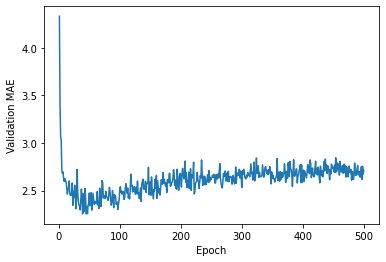

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.show()

In [16]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

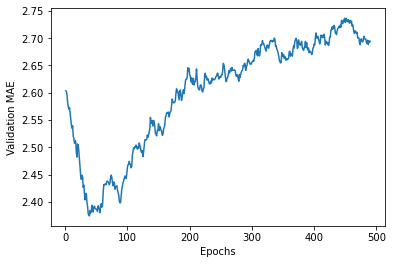

In [17]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [18]:
model = build_model()
model.fit(train_data, train_label, epochs=80, batch_size=16)

Epoch 1/80
26/26 [==============================] - 1s 1ms/step - loss: 540.5142 - mae: 21.1955
Epoch 2/80
26/26 [==============================] - 0s 2ms/step - loss: 318.0138 - mae: 15.2626
Epoch 3/80
26/26 [==============================] - 0s 2ms/step - loss: 153.8230 - mae: 9.8047
Epoch 4/80
26/26 [==============================] - 0s 2ms/step - loss: 65.4621 - mae: 6.0827
Epoch 5/80
26/26 [==============================] - 0s 2ms/step - loss: 41.4605 - mae: 4.5524
Epoch 6/80
26/26 [==============================] - 0s 2ms/step - loss: 28.4826 - mae: 3.8462
Epoch 7/80
26/26 [==============================] - 0s 2ms/step - loss: 24.5121 - mae: 3.4435
Epoch 8/80
26/26 [==============================] - 0s 2ms/step - loss: 16.7218 - mae: 2.9415
Epoch 9/80
26/26 [==============================] - 0s 2ms/step - loss: 23.1542 - mae: 3.2734
Epoch 10/80
26/26 [==============================] - 0s 2ms/step - loss: 16.3001 - mae: 2.7838
Epoch 11/80
26/26 [==============================] - 0

In [19]:
mse, mae = model.evaluate(test_data, test_label)

4/4 [==============================] - 0s 2ms/step - loss: 17.2865 - mae: 2.6574


In [20]:
print(mae)

2.657371759414673


In [29]:
predict = model.predict(test_data)

In [31]:
print(predict[1], test_label[1])

[18.59329] 18.8
